In [22]:
from pathlib import Path
from rich.console import Console
from rich.tree import Tree
from rich.table import Table
import pickle
import random

In [23]:
from map_analyzer.benchmark_framework.benchmark_orchestrator_rhea import (
    BenchmarkOrchestrator,
    BenchmarkOrchestratorResults,
    ModelConstraints
)

from map_analyzer.benchmarks import (
    maximum_degree,
    radius,
    number_of_leaves,
    diameter,
    assortativity,
    average_degree,
    clustering_coefficient,
)  # , face_if_planar
from map_analyzer.models import (
    real_life_maps,
    triangle_edge_deletion,
    flood_fill,
    waxman
)


In [24]:

NUM_ITERS = 1  # INFO: The higher the number of iterations the more accurate the estimates (set to 50 for comparability because we have 50 state maps)
SEED = 238  # INFO: Seed to ensure reproducible results

In [25]:
console = Console()

console.print("Loading real life models...")
real_life_model = real_life_maps.RealLifeMaps(
    cache_dir=Path("../data/maps"), map_types=["TRACT"]
)  # for sampling real-life maps
console.print("Real life models loaded", style="green")

models_to_test = [
    # triangle_edge_deletion.TriangleEdgeDeletionModel(p_delete=0.065, keep_connected=False, deter=False),
    # triangle_edge_deletion.TriangleEdgeDeletionModel(p_delete=0.065, keep_connected=True, deter=False),
    # triangle_edge_deletion.TriangleEdgeDeletionModel(p_delete=0.065, keep_connected=True, deter=True),
    # triangle_edge_deletion.TriangleEdgeDeletionModel(p_delete=0.065, keep_connected=False, deter=True),
    flood_fill.FloodFillModel(),
    # waxman.WaxmanModel(beta=0.4, alpha=0.1),
    # TODO: Add more models
]


Loading real life models...

/opt/anaconda3/envs/cs238/lib/python3.10/site-packages/gerrychain/graph/graph.py:388: UserWarning: Found islands (degree-0 nodes). Indices of islands: {5300}
  warnings.warn(
/opt/anaconda3/envs/cs238/lib/python3.10/site-packages/gerrychain/graph/graph.py:388: UserWarning: Found islands (degree-0 nodes). Indices of islands: {530}
  warnings.warn(
/opt/anaconda3/envs/cs238/lib/python3.10/site-packages/gerrychain/graph/graph.py:388: UserWarning: Found islands (degree-0 nodes). Indices of islands: {82}
  warnings.warn(
/opt/anaconda3/envs/cs238/lib/python3.10/site-packages/gerrychain/graph/graph.py:388: UserWarning: Found islands (degree-0 nodes). Indices of islands: {852}
  warnings.warn(


Real life models loaded

In [26]:
benchmarks_to_run = [
        assortativity.AssortativityBenchmark(),
        average_degree.AverageDegreeBenchmark(),
        clustering_coefficient.ClusteringCoefficientBenchmark(),
        diameter.DiameterBenchmark(),
        maximum_degree.MaximumDegreeBenchmark(),
        number_of_leaves.NumberOfLeavesBenchmark(),
        radius.RadiusBenchmark(),
        # face_if_planar.FaceIfPlanarBenchmark()
    ]

In [27]:
orchestrator = BenchmarkOrchestrator(benchmarks_to_run)

console.print("Processing benchmark results...")
benchmark_orchestrator_results = orchestrator.benchmark_null_models_against_real(
    real_life_model=real_life_model,
    models=models_to_test,
    num_iters=NUM_ITERS,  
    seed=SEED,
)
console.print("Benchmark results processed", style="green")

Processing benchmark results...

/Users/rheaacharya/Desktop/Spring 2024/CS238/cs238-final-project/src/map_analyzer/models/real_life_maps.py:48: UserWarning: `num_graphs` parameter is ignored by RealLifeMaps model (all loaded maps will be returned).
  warnings.warn(


/opt/anaconda3/envs/cs238/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Graph with 4761 nodes and 9384 edges

Graph with 1181 nodes and 3086 edges

Graph with 4761 nodes and 9384 edges

Graph with 784 nodes and 1512 edges

Graph with 167 nodes and 416 edges

Graph with 784 nodes and 1512 edges

Graph with 6400 nodes and 12640 edges

Graph with 1526 nodes and 4034 edges

Graph with 6400 nodes and 12640 edges

Graph with 2809 nodes and 5512 edges

Graph with 686 nodes and 1797 edges

Graph with 2809 nodes and 5512 edges

Graph with 33489 nodes and 66612 edges

In [1]:
for benchmark_orchestrator_result in benchmark_orchestrator_results:
        map_metadata = benchmark_orchestrator_result.real_map_generation.metadata
        real_map_benchmarks = benchmark_orchestrator_result.real_map_benchmarks
        model_benchmarks = benchmark_orchestrator_result.model_benchmarks

        root_style = "bold bright_blue"
        real_life_style = "bold yellow"
        model_style = "bold green"
        benchmark_style = "bold green"

        tree = Tree(
            f"==================== [{map_metadata.map_type}] {map_metadata.state_code} ====================",
            style=root_style,
            guide_style=root_style,
        )

        real_life_branch = tree.add(
            "Real Life Map", style=real_life_style, guide_style=real_life_style
        )

        real_life_table = Table()
        for benchmark, benchmark_results in zip(benchmarks_to_run, real_map_benchmarks):
            benchmark_name = benchmark.__class__.__name__
            benchmark.__class__.add_benchmark_metrics_to_table(
                real_life_table, benchmark_name, benchmark_results
            )
        real_life_branch.add(real_life_table)

        for model, benchmarks in zip(models_to_test, model_benchmarks):
            model_name = model.__class__.__name__
            model_branch = tree.add(
                model_name, style=model_style, guide_style=model_style
            )
            model_table = Table()
            for benchmark, benchmark_results in zip(benchmarks_to_run, benchmarks):
                benchmark_name = benchmark.__class__.__name__
                benchmark.__class__.add_benchmark_metrics_to_table(
                    model_table, benchmark_name, benchmark_results
                )
            model_branch.add(model_table)

        # print("1")
        constraints = map_analyzer.benchmark_framework.model_constraint_generator.generate_constraints_from_graph(real_life_model)
        # print("2")
        random.seed(111)
        # print("3")
        model = flood_fill.FloodFillModel()
        # print("4")
        graph_desired = model.generate_graph(constraints)
        # print("5")
        # def save_graph_data(graph_data, filename):
        output_dir = Path("../data/maps")
        # print("6")
        output_dir.mkdir(parents=True, exist_ok=True)
        # print("7")
        model_class_name = "FloodFillModel"
       # print("8")
        filename = output_dir / f"{model_class_name}_{map_metadata.state_code}_graph.pkl"
        # print("9")
        with open(filename, 'wb') as f:
            print("10")
            pickle.dump(graph_desired, f)

        # def load_graph_data(filename):
        with open(filename, 'rb') as f:
            print("11")
            loaded_graph_data = pickle.load(f)
  
        console.print(tree)

NameError: name 'benchmark_orchestrator_results' is not defined

1
2
3
4
Graph with 4761 nodes and 9384 edges


/Users/rheaacharya/Desktop/Spring 2024/CS238/cs238-final-project/src/map_analyzer/models/real_life_maps.py:48: UserWarning: `num_graphs` parameter is ignored by RealLifeMaps model (all loaded maps will be returned).
  warnings.warn(


Graph with 1181 nodes and 3108 edges
Graph with 4761 nodes and 9384 edges
5
6
7
8
9
10
11
2
3
4
Graph with 784 nodes and 1512 edges
Graph with 167 nodes and 421 edges
Graph with 784 nodes and 1512 edges
5
6
7
8
9
10
11
2
3
4
Graph with 6400 nodes and 12640 edges
Graph with 1526 nodes and 4064 edges
Graph with 6400 nodes and 12640 edges
5
6
7
8
9
10
11
2
3
4
Graph with 2809 nodes and 5512 edges


KeyboardInterrupt: 

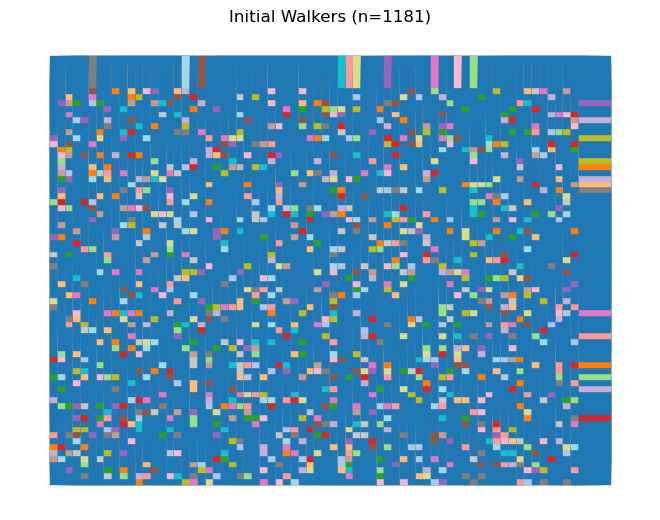

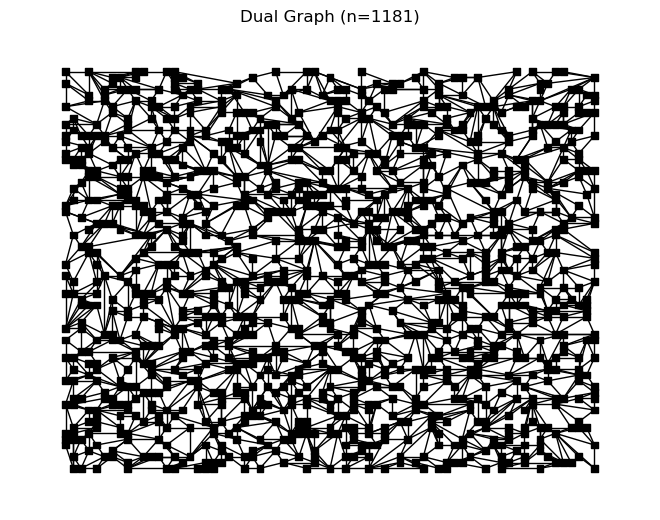

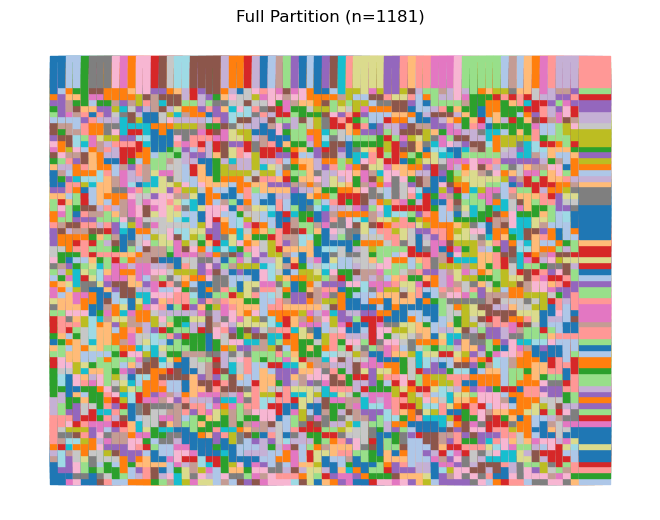

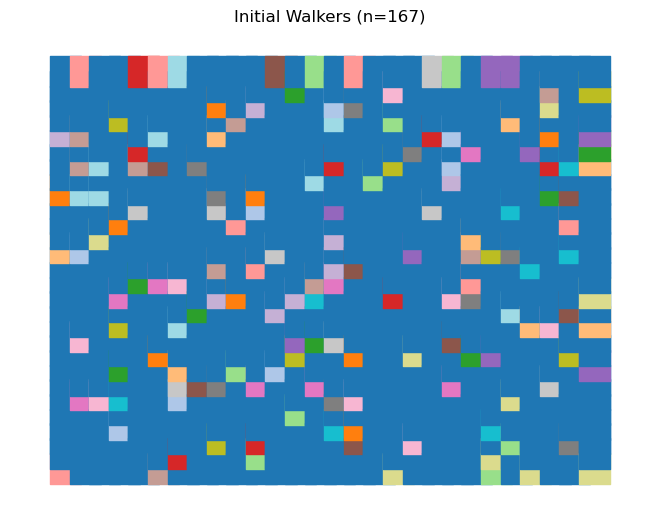

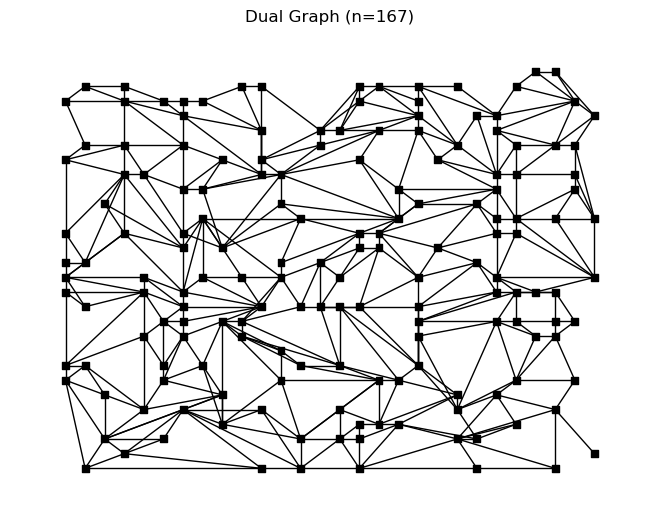

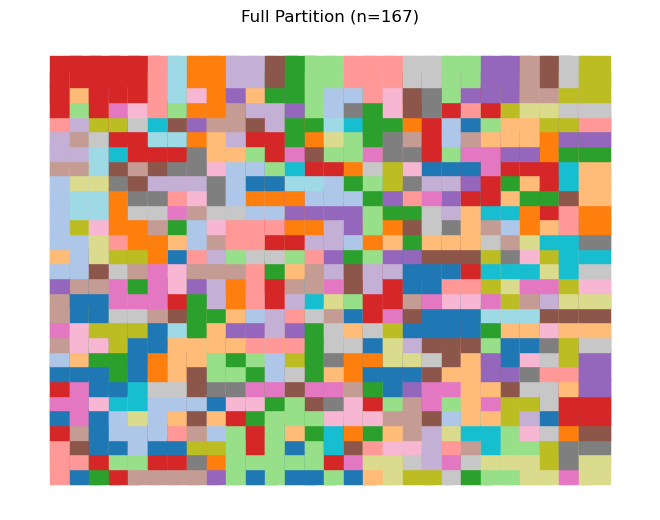

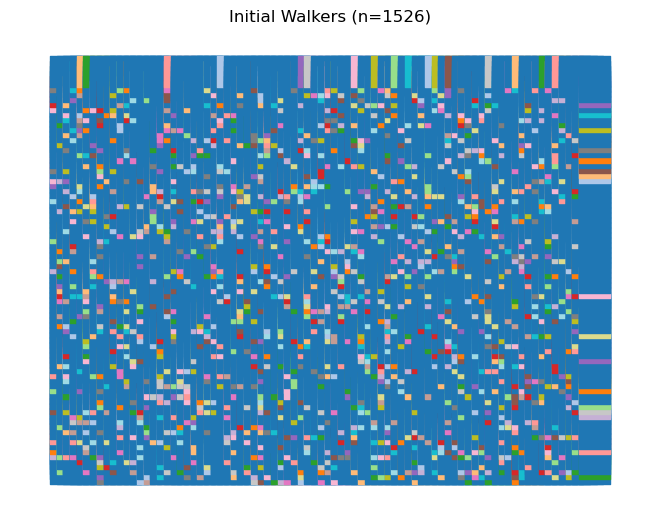

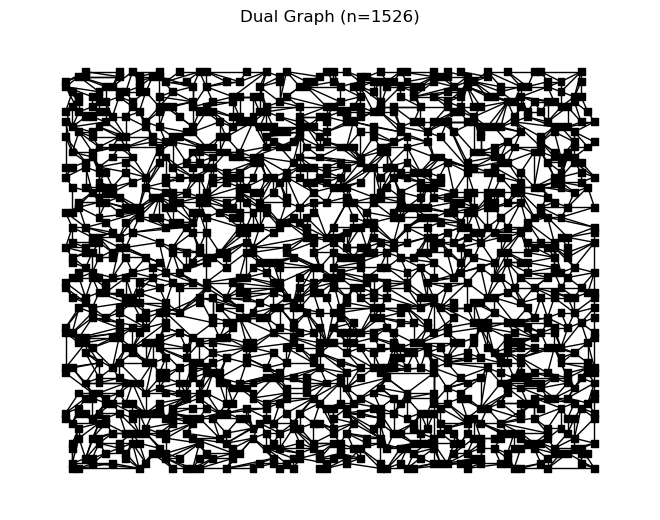

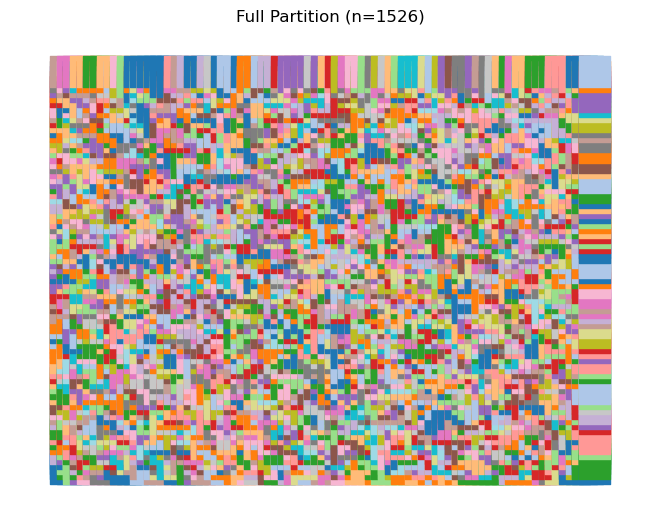

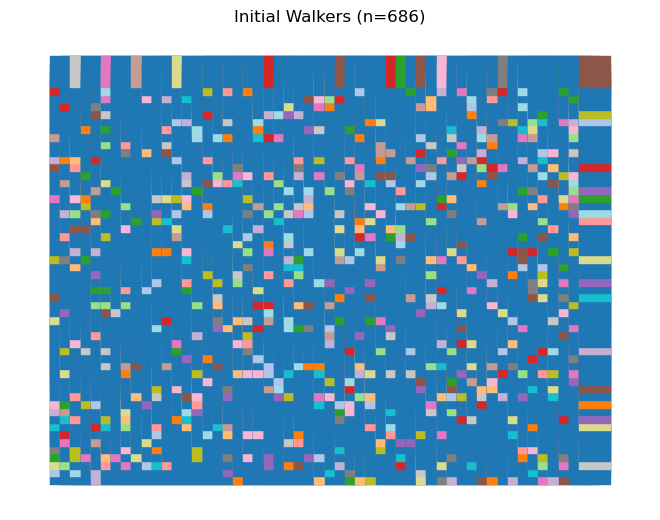

In [21]:
from map_analyzer.benchmark_framework.model_constraint_generator import generate_constraints_from_graph
print("1")
iter = 0
for map in real_life_model.get_all_graphs():
    iter += 1
    constraints = generate_constraints_from_graph(map.graph)
    print("2")
    random.seed(238)
    print("3")
    model = flood_fill.FloodFillModel()
    print("4")
    graph_desired = model.generate_graph(constraints)
    print("5")
    # def save_graph_data(graph_data, filename):
    output_dir = Path("../data/maps")
    print("6")
    output_dir.mkdir(parents=True, exist_ok=True)
    print("7")
    model_class_name = "FloodFillModel"
    print("8")
    filename = output_dir / f"{model_class_name}_{map.metadata.state_code}_graph.pkl"
    print("9")
    with open(filename, 'wb') as f:
        print("10")
        pickle.dump(graph_desired, f)

    with open(filename, 'rb') as f:
        print("11")
        loaded_graph_data = pickle.load(f)